In [1]:
# PART A

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

STUDENTID = 'PES2UG23CS195'

def get_student_assignment(studentid):
    lastthree = int(studentid[-3:])
    polytype = lastthree % 5
    np.random.seed(lastthree)
    # Polynomial assignment based on SRN
    if polytype == 0:  # Quadratic
        b = np.random.uniform(0.8, 1.5)
        c = np.random.uniform(3.0, 8.0)
        d = np.random.uniform(5.0, 15.0)
        polydesc = f'QUADRATIC: y = {b:.2f}x^2 + {c:.2f}x + {d:.2f}'
        coefficients = (b, c, d)
    elif polytype == 1:  # Cubic
        a = np.random.uniform(1.8, 2.5)
        b = np.random.uniform(-1.2, 0.2)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        polydesc = f'CUBIC: y = {a:.2f}x^3 + {b:.2f}x^2 + {c:.2f}x + {d:.2f}'
        coefficients = (a, b, c, d)
    elif polytype == 2:  # Quartic
        a = np.random.uniform(0.008, 0.02)
        b = np.random.uniform(1.5, 2.2)
        c = np.random.uniform(-1.0, 0.5)
        d = np.random.uniform(2.0, 5.0)
        e = np.random.uniform(8.0, 12.0)
        polydesc = f'QUARTIC: y = {a:.4f}x^4 + {b:.2f}x^3 + {c:.2f}x^2 + {d:.2f}x + {e:.2f}'
        coefficients = (a, b, c, d, e)
    elif polytype == 3:  # Cubic + Sine
        a = np.random.uniform(1.5, 2.8)
        b = np.random.uniform(-0.8, 0.8)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        freq = np.random.uniform(0.02, 0.05)
        amp = np.random.uniform(5.0, 15.0)
        polydesc = f'CUBIC SINE: y = {a:.2f}x^3 + {b:.2f}x^2 + {c:.2f}x + {d:.2f} + {amp:.1f}sin({freq:.3f}x)'
        coefficients = (a, b, c, d, freq, amp)
    else:  # Cubic + Inverse
        a = np.random.uniform(1.8, 2.5)
        b = np.random.uniform(-1.0, 0.5)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        invcoeff = np.random.uniform(50, 200)
        polydesc = f'CUBIC INVERSE: y = {a:.2f}x^3 + {b:.2f}x^2 + {c:.2f}x + {d:.2f} + {invcoeff:.1f}/x'
        coefficients = (a, b, c, d, invcoeff)
    noise_std = np.random.uniform(1.5, 2.5)
    archtype = lastthree % 4
    architectures = [
        {'hidden1': 64, 'hidden2': 64, 'lr': 0.001, 'batch_desc': 'Balanced Architecture'},
        {'hidden1': 32, 'hidden2': 72, 'lr': 0.005, 'batch_desc': 'Narrow-to-Wide Architecture'},
        {'hidden1': 72, 'hidden2': 32, 'lr': 0.001, 'batch_desc': 'Wide-to-Narrow Architecture'},
        {'hidden1': 96, 'hidden2': 96, 'lr': 0.003, 'batch_desc': 'Large Balanced Architecture'},
    ]
    return {
        'polynomial_type': polytype,
        'degree': [2, 3, 4, 3, 3][polytype],
        'coefficients': coefficients,
        'polynomial_desc': polydesc,
        'noise_std': noise_std,
        'architecture': architectures[archtype],
        'student_seed': lastthree,
    }

assignment = get_student_assignment(STUDENTID)
polytype = assignment['polynomial_type']
coefficients = assignment['coefficients']
noise_std = assignment['noise_std']
hidden1 = assignment['architecture']['hidden1']
hidden2 = assignment['architecture']['hidden2']
learning_rate = assignment['architecture']['lr']

print('='*70)
print(f'ASSIGNMENT FOR STUDENT ID {STUDENTID}')
print('='*70)
print('Polynomial Type:', assignment['polynomial_desc'])
print(f'Noise Level N₀: {noise_std:.2f}')
print(f'Architecture: Input1 Hidden{hidden1} Hidden{hidden2} Output1')
print(f'Learning Rate: {learning_rate}')
print('Architecture Type:', assignment['architecture']['batch_desc'])
print('='*70)

np.random.seed(assignment['student_seed'])
nsamples = 100000
x = np.random.uniform(-100, 100, nsamples)

if polytype == 0:
    b, c, d = coefficients
    y = b * x**2 + c * x + d + np.random.normal(0, noise_std, nsamples)
elif polytype == 1:
    a, b, c, d = coefficients
    y = a * x**3 + b * x**2 + c * x + d + np.random.normal(0, noise_std, nsamples)
elif polytype == 2:
    a, b, c, d, e = coefficients
    y = a * x**4 + b * x**3 + c * x**2 + d * x + e + np.random.normal(0, noise_std, nsamples)
elif polytype == 3:
    a, b, c, d, freq, amp = coefficients
    y = a * x**3 + b * x**2 + c * x + d + amp * np.sin(freq * x) + np.random.normal(0, noise_std, nsamples)
else:
    a, b, c, d, invcoeff = coefficients
    y = a * x**3 + b * x**2 + c * x + d + invcoeff / (x + np.sign(x)*0.1) + np.random.normal(0, noise_std, nsamples)

df = pd.DataFrame({'x': x, 'y': y})
df.to_csv('student_polynomial_dataset.csv', index=False)
print(f'Dataset with {nsamples} samples generated and saved!')

X = df['x'].values.reshape(-1, 1)
Y = df['y'].values.reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scalerX = StandardScaler()
scalerY = StandardScaler()
X_train_scaled = scalerX.fit_transform(X_train)
X_test_scaled = scalerX.transform(X_test)
Y_train_scaled = scalerY.fit_transform(Y_train)
Y_test_scaled = scalerY.transform(Y_test)

print('Training samples:', len(X_train_scaled))
print('Test samples:', len(X_test_scaled))


ASSIGNMENT FOR STUDENT ID PES2UG23CS195
Polynomial Type: QUADRATIC: y = 1.42x^2 + 3.49x + 8.52
Noise Level N₀: 2.08
Architecture: Input1 Hidden96 Hidden96 Output1
Learning Rate: 0.003
Architecture Type: Large Balanced Architecture
Dataset with 100000 samples generated and saved!
Training samples: 80000
Test samples: 20000


Training Neural Network with your specific configuration...
Starting training...
Architecture: 1-96-96-1
Learning Rate: 0.003
Max Epochs: 500, Early Stopping Patience: 10
--------------------------------------------------
Epoch  20 | Train Loss: 1.035004 | Test Loss: 1.013847
Epoch  40 | Train Loss: 0.994914 | Test Loss: 0.975840
Epoch  60 | Train Loss: 0.960828 | Test Loss: 0.943060
Epoch  80 | Train Loss: 0.928495 | Test Loss: 0.911812
Epoch 100 | Train Loss: 0.897664 | Test Loss: 0.882014
Epoch 120 | Train Loss: 0.868210 | Test Loss: 0.853499
Epoch 140 | Train Loss: 0.841688 | Test Loss: 0.827712
Epoch 160 | Train Loss: 0.815192 | Test Loss: 0.801770
Epoch 180 | Train Loss: 0.789617 | Test Loss: 0.776771
Epoch 200 | Train Loss: 0.764250 | Test Loss: 0.751838
Epoch 220 | Train Loss: 0.738139 | Test Loss: 0.726174
Epoch 240 | Train Loss: 0.711544 | Test Loss: 0.700027
Epoch 260 | Train Loss: 0.685188 | Test Loss: 0.674146
Epoch 280 | Train Loss: 0.658846 | Test Loss: 0.648233
Epoch 30

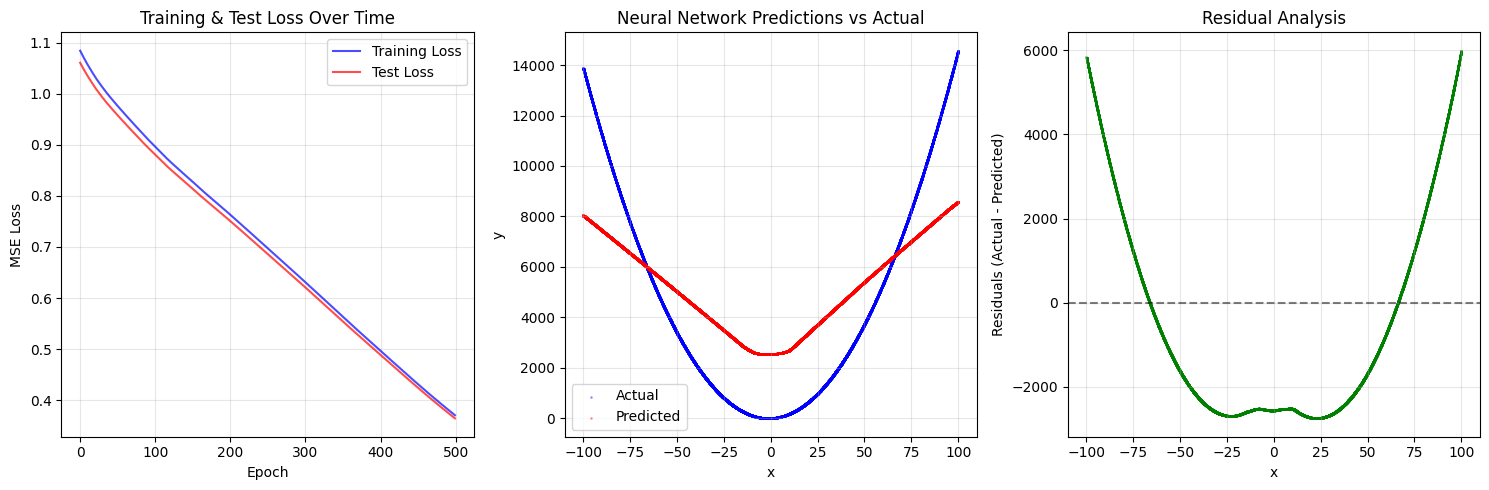

------------------------------------------------------------
PREDICTION RESULTS FOR x = 90.2
------------------------------------------------------------
Neural Network Prediction: 7988.71
Ground Truth formula: 11885.76
Absolute Error: 3897.05
Relative Error: 32.788%
------------------------------------------------------------
FINAL PERFORMANCE SUMMARY
------------------------------------------------------------
Final Training Loss: 0.370694
Final Test Loss: 0.364594
R^2 Score: 0.6285
Total Epochs Run: 500


In [3]:
#Part-A

# Activation Functions
def relu(z):
    # TODO: implement the ReLU formula
    return np.maximum(0, z)

def relu_derivative(z):
    # TODO: implement the ReLU derivative formula
    return (z > 0).astype(float)

# Loss Function
def mse_loss(y_true, y_pred):
    # TODO: implement the MSE formula
    return np.mean((y_true - y_pred)**2)

# Xavier Initialization
def xavier_initialization(input_dim, hidden1, hidden2, output_dim):
    # TODO: IMPLEMENT XAVIER WEIGHT INITIALIZATION
    np.random.seed(assignment['student_seed'])
    # Implement weight and bias initialization
    W1 = np.random.randn(input_dim, hidden1) * np.sqrt(2 / (input_dim + hidden1)) # Replace with proper weight initialization
    b1 = np.zeros((1, hidden1))
    W2 = np.random.randn(hidden1, hidden2) * np.sqrt(2 / (hidden1 + hidden2))
    b2 = np.zeros((1, hidden2))
    W3 = np.random.randn(hidden2, output_dim) * np.sqrt(2 / (hidden2 + output_dim))
    b3 = np.zeros((1, output_dim))
    return W1, b1, W2, b2, W3, b3

# Forward Propagation
def forward_pass(X, W1, b1, W2, b2, W3, b3):
    # TODO: IMPLEMENT FORWARD PROPAGATION
    z1 = X @ W1 + b1
    a1 = relu(z1)
    z2 = a1 @ W2 + b2
    a2 = relu(z2)
    z3 = a2 @ W3 + b3
    return z1, a1, z2, a2, z3

# Backward Propagation
def backward_pass(X, Y_true, z1, a1, z2, a2, Y_pred, W2, W3):
    # TODO: IMPLEMENT BACKPROPAGATION
    m = len(X)
    dY_pred = (Y_pred - Y_true) * 2 / m
    dW3 = a2.T @ dY_pred
    db3 = np.sum(dY_pred, axis=0, keepdims=True)
    da2 = dY_pred @ W3.T
    dz2 = da2 * relu_derivative(z2)
    dW2 = a1.T @ dz2
    db2 = np.sum(dz2, axis=0, keepdims=True)
    da1 = dz2 @ W2.T
    dz1 = da1 * relu_derivative(z1)
    dW1 = X.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)
    return dW1, db1, dW2, db2, dW3, db3

# Training Function
def train_neural_network(X_train, Y_train, X_test, Y_test, epochs=200, patience=10):
    # TODO: COMPLETE THE TRAINING LOOP
    W1, b1, W2, b2, W3, b3 = xavier_initialization(1, hidden1, hidden2, 1)
    best_test_loss = float('inf')
    best_weights = None
    patience_counter = 0

    train_losses = []
    test_losses = []

    print("Starting training...")
    print(f"Architecture: 1-{hidden1}-{hidden2}-1")
    print(f"Learning Rate: {learning_rate}")
    print(f"Max Epochs: {epochs}, Early Stopping Patience: {patience}")
    print("-" * 50)

    for epoch in range(epochs):
        z1, a1, z2, a2, Y_pred_train = forward_pass(X_train, W1, b1, W2, b2, W3, b3)
        train_loss = mse_loss(Y_train, Y_pred_train)
        dW1, db1, dW2, db2, dW3, db3 = backward_pass(X_train, Y_train, z1, a1, z2, a2, Y_pred_train, W2, W3)
        # TODO: Update weights and biases here
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W3 -= learning_rate * dW3
        b3 -= learning_rate * db3


        z1_test, a1_test, z2_test, a2_test, Y_pred_test = forward_pass(X_test, W1, b1, W2, b2, W3, b3)
        test_loss = mse_loss(Y_test, Y_pred_test)
        train_losses.append(train_loss)
        test_losses.append(test_loss)

        if (epoch + 1) % 20 == 0:
            print(f"Epoch {epoch + 1:3d} | Train Loss: {train_loss:.6f} | Test Loss: {test_loss:.6f}")

        if test_loss < best_test_loss:
            best_test_loss = test_loss
            best_weights = (W1, b1, W2, b2, W3, b3)
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print("Early stopping triggered at epoch", epoch + 1)
            print("Best test loss:", best_test_loss)
            break

    return best_weights, train_losses, test_losses

# -- MAIN TRAINING AND TEST EXECUTION --

print("Training Neural Network with your specific configuration...")
weights, train_losses, test_losses = train_neural_network(
    X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled,
    epochs=500, patience=10
)

# Results Visualization
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Training Loss', color='blue', alpha=0.7)
plt.plot(test_losses, label='Test Loss', color='red', alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training & Test Loss Over Time')
plt.legend()
plt.grid(True, alpha=0.3)

W1, b1, W2, b2, W3, b3 = weights
Y_pred_scaled = forward_pass(X_test_scaled, W1, b1, W2, b2, W3, b3)[-1]
Y_test_orig = scalerY.inverse_transform(Y_test_scaled)
Y_pred_orig = scalerY.inverse_transform(Y_pred_scaled)
X_test_orig = scalerX.inverse_transform(X_test_scaled)

plt.subplot(1, 3, 2)
plt.scatter(X_test_orig, Y_test_orig, s=1, alpha=0.3, label='Actual', color='blue')
plt.scatter(X_test_orig, Y_pred_orig, s=1, alpha=0.3, label='Predicted', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neural Network Predictions vs Actual')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
residuals = Y_test_orig.flatten() - Y_pred_orig.flatten()
plt.scatter(X_test_orig, residuals, s=1, alpha=0.3, color='green')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.xlabel('x')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Analysis')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

xtestvalue = 90.2
xnew = np.array([[xtestvalue]])
xnew_scaled = scalerX.transform(xnew)
ypred_scaled = forward_pass(xnew_scaled, W1, b1, W2, b2, W3, b3)[-1]
ypred = scalerY.inverse_transform(ypred_scaled)

if polytype == 0:
    b, c, d = coefficients
    ytrue = b * xtestvalue**2 + c * xtestvalue + d
elif polytype == 1:
    a, b, c, d = coefficients
    ytrue = a * xtestvalue**3 + b * xtestvalue**2 + c * xtestvalue + d
elif polytype == 2:
    a, b, c, d, e = coefficients
    ytrue = a * xtestvalue**4 + b * xtestvalue**3 + c * xtestvalue**2 + d * xtestvalue + e
elif polytype == 3:
    a, b, c, d, freq, amp = coefficients
    ytrue = a * xtestvalue**3 + b * xtestvalue**2 + c * xtestvalue + d + amp * np.sin(freq * xtestvalue)
else:
    a, b, c, d, invcoeff = coefficients
    ytrue = a * xtestvalue**3 + b * xtestvalue**2 + c * xtestvalue + d + invcoeff / (xtestvalue + np.sign(xtestvalue) * 0.1)

print('-'*60)
print('PREDICTION RESULTS FOR x = 90.2')
print('-'*60)
print(f'Neural Network Prediction: {ypred[0,0]:.2f}')
print(f'Ground Truth formula: {ytrue:.2f}')
print(f'Absolute Error: {abs(ypred[0,0] - ytrue):.2f}')
print(f'Relative Error: {abs(ypred[0,0] - ytrue) / abs(ytrue) * 100:.3f}%')

final_train_loss = train_losses[-1] if train_losses else float('inf')
final_test_loss = test_losses[-1] if test_losses else float('inf')

ytest_mean = np.mean(Y_test_orig)
ssres = np.sum((Y_test_orig - Y_pred_orig) ** 2)
sstot = np.sum((Y_test_orig - ytest_mean) ** 2)
r2_score = 1 - ssres / sstot

print('-'*60)
print('FINAL PERFORMANCE SUMMARY')
print('-'*60)
print(f'Final Training Loss: {final_train_loss:.6f}')
print(f'Final Test Loss: {final_test_loss:.6f}')
print(f'R^2 Score: {r2_score:.4f}')
print(f'Total Epochs Run: {len(train_losses)}')


EXPERIMENT 1: HIGHER LEARNING RATE
Training with Learning Rate: 0.01
Starting training...
Architecture: 1-96-96-1
Learning Rate: 0.01
Max Epochs: 500, Early Stopping Patience: 10
--------------------------------------------------
Epoch  20 | Train Loss: 0.953940 | Test Loss: 0.932810
Epoch  40 | Train Loss: 0.853531 | Test Loss: 0.836381
Epoch  60 | Train Loss: 0.768396 | Test Loss: 0.753088
Epoch  80 | Train Loss: 0.682813 | Test Loss: 0.668920
Epoch 100 | Train Loss: 0.593771 | Test Loss: 0.581038
Epoch 120 | Train Loss: 0.504523 | Test Loss: 0.493336
Epoch 140 | Train Loss: 0.417441 | Test Loss: 0.407684
Epoch 160 | Train Loss: 0.337558 | Test Loss: 0.329369
Epoch 180 | Train Loss: 0.267113 | Test Loss: 0.260561
Epoch 200 | Train Loss: 0.208906 | Test Loss: 0.203717
Epoch 220 | Train Loss: 0.161985 | Test Loss: 0.157906
Epoch 240 | Train Loss: 0.125176 | Test Loss: 0.121993
Epoch 260 | Train Loss: 0.097244 | Test Loss: 0.094778
Epoch 280 | Train Loss: 0.076657 | Test Loss: 0.074745

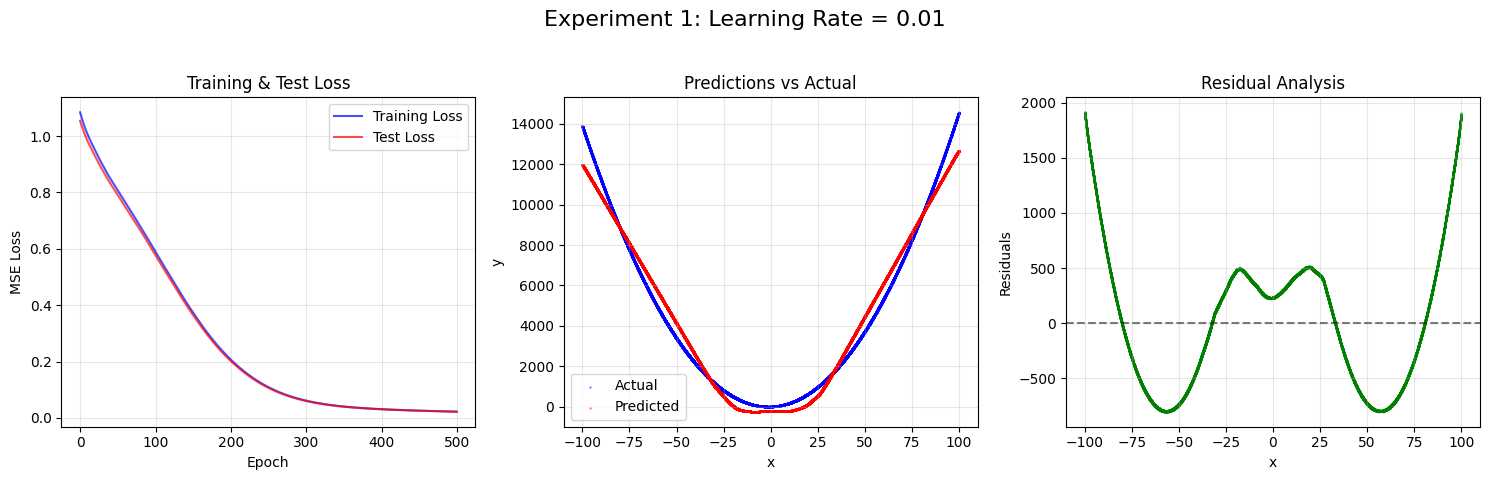

------------------------------------------------------------
EXPERIMENT 1 PERFORMANCE SUMMARY
------------------------------------------------------------
Final Test Loss: 0.021992
R^2 Score: 0.9776
Total Epochs Run: 500


In [4]:
# Cell 1: Experiment with a higher learning rate

print("\n" + "="*70)
print("EXPERIMENT 1: HIGHER LEARNING RATE")
print("="*70)

# --- Hyperparameter Modification ---
# Increased learning rate from 0.003 to 0.01
learning_rate = 0.01
hidden1 = 96
hidden2 = 96
epochs = 500
patience = 10

# --- Retrain the Model ---
print(f"Training with Learning Rate: {learning_rate}")
weights_exp1, train_losses_exp1, test_losses_exp1 = train_neural_network(
    X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled,
    epochs=epochs, patience=patience
)

# --- Results Visualization ---
plt.figure(figsize=(15, 5))
plt.suptitle(f'Experiment 1: Learning Rate = {learning_rate}', fontsize=16)

# Plot Loss
plt.subplot(1, 3, 1)
plt.plot(train_losses_exp1, label='Training Loss', color='blue', alpha=0.7)
plt.plot(test_losses_exp1, label='Test Loss', color='red', alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training & Test Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot Predictions vs Actual
W1, b1, W2, b2, W3, b3 = weights_exp1
Y_pred_scaled = forward_pass(X_test_scaled, W1, b1, W2, b2, W3, b3)[-1]
Y_pred_orig = scalerY.inverse_transform(Y_pred_scaled)

plt.subplot(1, 3, 2)
plt.scatter(X_test_orig, Y_test_orig, s=1, alpha=0.3, label='Actual', color='blue')
plt.scatter(X_test_orig, Y_pred_orig, s=1, alpha=0.3, label='Predicted', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predictions vs Actual')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot Residuals
plt.subplot(1, 3, 3)
residuals = Y_test_orig.flatten() - Y_pred_orig.flatten()
plt.scatter(X_test_orig, residuals, s=1, alpha=0.3, color='green')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.xlabel('x')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.grid(True, alpha=0.3)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- Performance Summary ---
final_test_loss_exp1 = test_losses_exp1[-1] if test_losses_exp1 else float('inf')
ssres = np.sum((Y_test_orig - Y_pred_orig) ** 2)
sstot = np.sum((Y_test_orig - np.mean(Y_test_orig)) ** 2)
r2_score_exp1 = 1 - ssres / sstot

print('-'*60)
print('EXPERIMENT 1 PERFORMANCE SUMMARY')
print('-'*60)
print(f'Final Test Loss: {final_test_loss_exp1:.6f}')
print(f'R^2 Score: {r2_score_exp1:.4f}')
print(f'Total Epochs Run: {len(train_losses_exp1)}')


EXPERIMENT 2: LOWER LEARNING RATE
Training with Learning Rate: 0.0005
Starting training...
Architecture: 1-96-96-1
Learning Rate: 0.0005
Max Epochs: 500, Early Stopping Patience: 10
--------------------------------------------------
Epoch  20 | Train Loss: 1.075046 | Test Loss: 1.054125
Epoch  40 | Train Loss: 1.065889 | Test Loss: 1.045347
Epoch  60 | Train Loss: 1.057147 | Test Loss: 1.036993
Epoch  80 | Train Loss: 1.048934 | Test Loss: 1.029117
Epoch 100 | Train Loss: 1.040923 | Test Loss: 1.021430
Epoch 120 | Train Loss: 1.033019 | Test Loss: 1.013838
Epoch 140 | Train Loss: 1.025836 | Test Loss: 1.006977
Epoch 160 | Train Loss: 1.019005 | Test Loss: 1.000414
Epoch 180 | Train Loss: 1.012303 | Test Loss: 0.993971
Epoch 200 | Train Loss: 1.005754 | Test Loss: 0.987674
Epoch 220 | Train Loss: 0.999440 | Test Loss: 0.981613
Epoch 240 | Train Loss: 0.993462 | Test Loss: 0.975857
Epoch 260 | Train Loss: 0.987591 | Test Loss: 0.970201
Epoch 280 | Train Loss: 0.981810 | Test Loss: 0.964

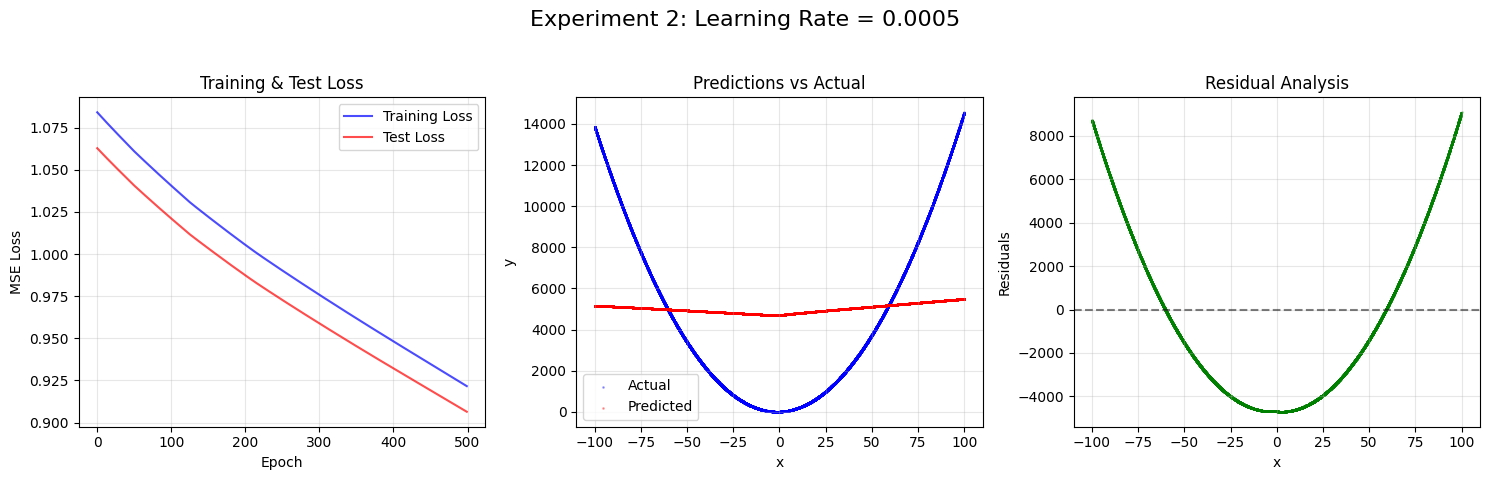

------------------------------------------------------------
EXPERIMENT 2 PERFORMANCE SUMMARY
------------------------------------------------------------
Final Test Loss: 0.906451
R^2 Score: 0.0764
Total Epochs Run: 500


In [5]:
# Cell 2: Experiment with a lower learning rate

print("\n" + "="*70)
print("EXPERIMENT 2: LOWER LEARNING RATE")
print("="*70)

# --- Hyperparameter Modification ---
# Decreased learning rate from 0.003 to 0.0005
learning_rate = 0.0005
hidden1 = 96
hidden2 = 96
epochs = 500
patience = 10

# --- Retrain the Model ---
print(f"Training with Learning Rate: {learning_rate}")
weights_exp2, train_losses_exp2, test_losses_exp2 = train_neural_network(
    X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled,
    epochs=epochs, patience=patience
)

# --- Results Visualization ---
plt.figure(figsize=(15, 5))
plt.suptitle(f'Experiment 2: Learning Rate = {learning_rate}', fontsize=16)

# Plot Loss
plt.subplot(1, 3, 1)
plt.plot(train_losses_exp2, label='Training Loss', color='blue', alpha=0.7)
plt.plot(test_losses_exp2, label='Test Loss', color='red', alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training & Test Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot Predictions vs Actual
W1, b1, W2, b2, W3, b3 = weights_exp2
Y_pred_scaled = forward_pass(X_test_scaled, W1, b1, W2, b2, W3, b3)[-1]
Y_pred_orig = scalerY.inverse_transform(Y_pred_scaled)

plt.subplot(1, 3, 2)
plt.scatter(X_test_orig, Y_test_orig, s=1, alpha=0.3, label='Actual', color='blue')
plt.scatter(X_test_orig, Y_pred_orig, s=1, alpha=0.3, label='Predicted', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predictions vs Actual')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot Residuals
plt.subplot(1, 3, 3)
residuals = Y_test_orig.flatten() - Y_pred_orig.flatten()
plt.scatter(X_test_orig, residuals, s=1, alpha=0.3, color='green')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.xlabel('x')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.grid(True, alpha=0.3)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- Performance Summary ---
final_test_loss_exp2 = test_losses_exp2[-1] if test_losses_exp2 else float('inf')
ssres = np.sum((Y_test_orig - Y_pred_orig) ** 2)
sstot = np.sum((Y_test_orig - np.mean(Y_test_orig)) ** 2)
r2_score_exp2 = 1 - ssres / sstot

print('-'*60)
print('EXPERIMENT 2 PERFORMANCE SUMMARY')
print('-'*60)
print(f'Final Test Loss: {final_test_loss_exp2:.6f}')
print(f'R^2 Score: {r2_score_exp2:.4f}')
print(f'Total Epochs Run: {len(train_losses_exp2)}')


EXPERIMENT 3: INCREASED EPOCHS AND PATIENCE
Training with Max Epochs: 1000, Patience: 20
Starting training...
Architecture: 1-96-96-1
Learning Rate: 0.003
Max Epochs: 1000, Early Stopping Patience: 20
--------------------------------------------------
Epoch  20 | Train Loss: 1.035004 | Test Loss: 1.013847
Epoch  40 | Train Loss: 0.994914 | Test Loss: 0.975840
Epoch  60 | Train Loss: 0.960828 | Test Loss: 0.943060
Epoch  80 | Train Loss: 0.928495 | Test Loss: 0.911812
Epoch 100 | Train Loss: 0.897664 | Test Loss: 0.882014
Epoch 120 | Train Loss: 0.868210 | Test Loss: 0.853499
Epoch 140 | Train Loss: 0.841688 | Test Loss: 0.827712
Epoch 160 | Train Loss: 0.815192 | Test Loss: 0.801770
Epoch 180 | Train Loss: 0.789617 | Test Loss: 0.776771
Epoch 200 | Train Loss: 0.764250 | Test Loss: 0.751838
Epoch 220 | Train Loss: 0.738139 | Test Loss: 0.726174
Epoch 240 | Train Loss: 0.711544 | Test Loss: 0.700027
Epoch 260 | Train Loss: 0.685188 | Test Loss: 0.674146
Epoch 280 | Train Loss: 0.658846

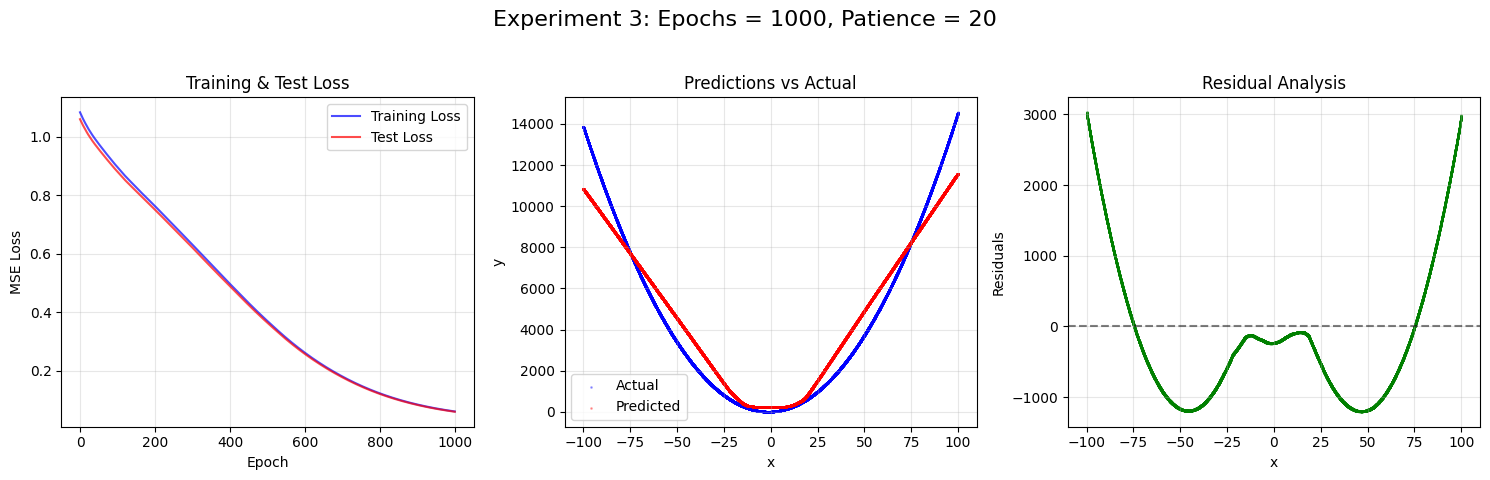

------------------------------------------------------------
EXPERIMENT 3 PERFORMANCE SUMMARY
------------------------------------------------------------
Final Test Loss: 0.059700
R^2 Score: 0.9392
Total Epochs Run: 1000


In [6]:
# Cell 3: Experiment with more epochs and higher patience

print("\n" + "="*70)
print("EXPERIMENT 3: INCREASED EPOCHS AND PATIENCE")
print("="*70)

# --- Hyperparameter Modification ---
# Using baseline learning rate
learning_rate = 0.003
hidden1 = 96
hidden2 = 96
# Increased epochs and patience
epochs = 1000
patience = 20

# --- Retrain the Model ---
print(f"Training with Max Epochs: {epochs}, Patience: {patience}")
weights_exp3, train_losses_exp3, test_losses_exp3 = train_neural_network(
    X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled,
    epochs=epochs, patience=patience
)

# --- Results Visualization ---
plt.figure(figsize=(15, 5))
plt.suptitle(f'Experiment 3: Epochs = {epochs}, Patience = {patience}', fontsize=16)

# Plot Loss
plt.subplot(1, 3, 1)
plt.plot(train_losses_exp3, label='Training Loss', color='blue', alpha=0.7)
plt.plot(test_losses_exp3, label='Test Loss', color='red', alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training & Test Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot Predictions vs Actual
W1, b1, W2, b2, W3, b3 = weights_exp3
Y_pred_scaled = forward_pass(X_test_scaled, W1, b1, W2, b2, W3, b3)[-1]
Y_pred_orig = scalerY.inverse_transform(Y_pred_scaled)

plt.subplot(1, 3, 2)
plt.scatter(X_test_orig, Y_test_orig, s=1, alpha=0.3, label='Actual', color='blue')
plt.scatter(X_test_orig, Y_pred_orig, s=1, alpha=0.3, label='Predicted', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predictions vs Actual')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot Residuals
plt.subplot(1, 3, 3)
residuals = Y_test_orig.flatten() - Y_pred_orig.flatten()
plt.scatter(X_test_orig, residuals, s=1, alpha=0.3, color='green')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.xlabel('x')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.grid(True, alpha=0.3)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- Performance Summary ---
final_test_loss_exp3 = test_losses_exp3[-1] if test_losses_exp3 else float('inf')
ssres = np.sum((Y_test_orig - Y_pred_orig) ** 2)
sstot = np.sum((Y_test_orig - np.mean(Y_test_orig)) ** 2)
r2_score_exp3 = 1 - ssres / sstot

print('-'*60)
print('EXPERIMENT 3 PERFORMANCE SUMMARY')
print('-'*60)
print(f'Final Test Loss: {final_test_loss_exp3:.6f}')
print(f'R^2 Score: {r2_score_exp3:.4f}')
print(f'Total Epochs Run: {len(train_losses_exp3)}')


EXPERIMENT 4: DIFFERENT ARCHITECTURE (64-64)
Training with Architecture: 1-64-64-1
Starting training...
Architecture: 1-64-64-1
Learning Rate: 0.003
Max Epochs: 500, Early Stopping Patience: 10
--------------------------------------------------
Epoch  20 | Train Loss: 0.907620 | Test Loss: 0.891702
Epoch  40 | Train Loss: 0.871461 | Test Loss: 0.856833
Epoch  60 | Train Loss: 0.837400 | Test Loss: 0.823842
Epoch  80 | Train Loss: 0.804402 | Test Loss: 0.791663
Epoch 100 | Train Loss: 0.771156 | Test Loss: 0.759220
Epoch 120 | Train Loss: 0.739402 | Test Loss: 0.728219
Epoch 140 | Train Loss: 0.708174 | Test Loss: 0.697629
Epoch 160 | Train Loss: 0.677017 | Test Loss: 0.667020
Epoch 180 | Train Loss: 0.645785 | Test Loss: 0.636276
Epoch 200 | Train Loss: 0.614441 | Test Loss: 0.605403
Epoch 220 | Train Loss: 0.583066 | Test Loss: 0.574474
Epoch 240 | Train Loss: 0.551420 | Test Loss: 0.543250
Epoch 260 | Train Loss: 0.519513 | Test Loss: 0.511745
Epoch 280 | Train Loss: 0.487408 | Test

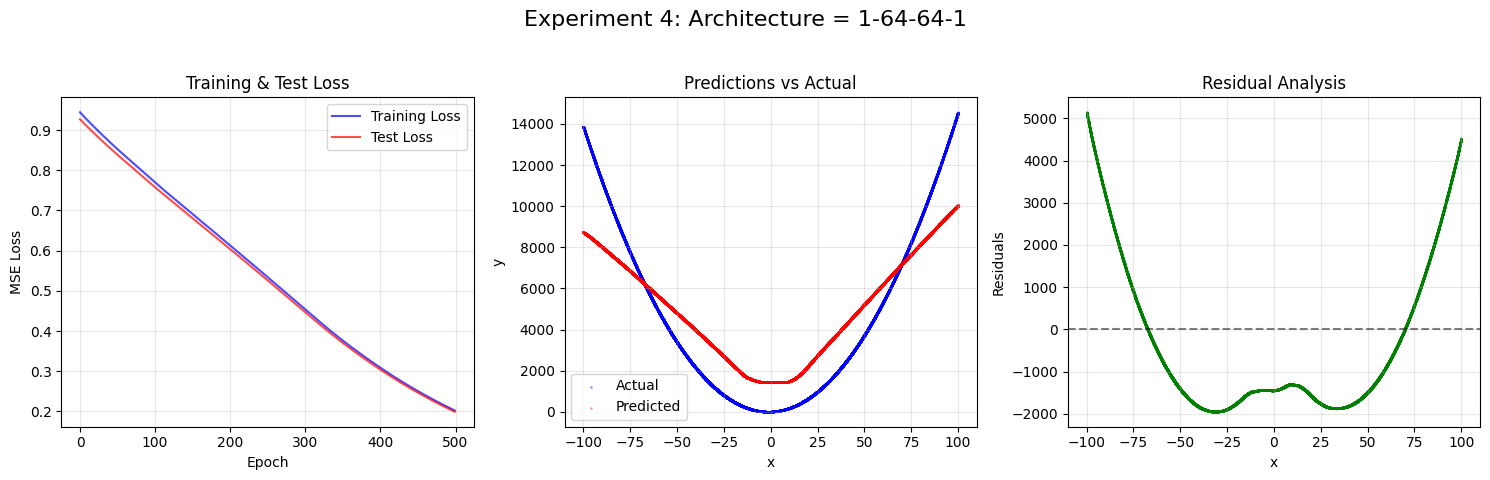

------------------------------------------------------------
EXPERIMENT 4 PERFORMANCE SUMMARY
------------------------------------------------------------
Final Test Loss: 0.199090
R^2 Score: 0.7971
Total Epochs Run: 500


In [7]:
# Cell 4: Experiment with a different architecture

print("\n" + "="*70)
print("EXPERIMENT 4: DIFFERENT ARCHITECTURE (64-64)")
print("="*70)

# --- Hyperparameter Modification ---
# Using baseline learning rate and epochs
learning_rate = 0.003
epochs = 500
patience = 10
# Changed network architecture
hidden1 = 64
hidden2 = 64

# --- Retrain the Model ---
print(f"Training with Architecture: 1-{hidden1}-{hidden2}-1")
weights_exp4, train_losses_exp4, test_losses_exp4 = train_neural_network(
    X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled,
    epochs=epochs, patience=patience
)

# --- Results Visualization ---
plt.figure(figsize=(15, 5))
plt.suptitle(f'Experiment 4: Architecture = 1-{hidden1}-{hidden2}-1', fontsize=16)

# Plot Loss
plt.subplot(1, 3, 1)
plt.plot(train_losses_exp4, label='Training Loss', color='blue', alpha=0.7)
plt.plot(test_losses_exp4, label='Test Loss', color='red', alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training & Test Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot Predictions vs Actual
W1, b1, W2, b2, W3, b3 = weights_exp4
Y_pred_scaled = forward_pass(X_test_scaled, W1, b1, W2, b2, W3, b3)[-1]
Y_pred_orig = scalerY.inverse_transform(Y_pred_scaled)

plt.subplot(1, 3, 2)
plt.scatter(X_test_orig, Y_test_orig, s=1, alpha=0.3, label='Actual', color='blue')
plt.scatter(X_test_orig, Y_pred_orig, s=1, alpha=0.3, label='Predicted', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predictions vs Actual')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot Residuals
plt.subplot(1, 3, 3)
residuals = Y_test_orig.flatten() - Y_pred_orig.flatten()
plt.scatter(X_test_orig, residuals, s=1, alpha=0.3, color='green')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.xlabel('x')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.grid(True, alpha=0.3)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- Performance Summary ---
final_test_loss_exp4 = test_losses_exp4[-1] if test_losses_exp4 else float('inf')
ssres = np.sum((Y_test_orig - Y_pred_orig) ** 2)
sstot = np.sum((Y_test_orig - np.mean(Y_test_orig)) ** 2)
r2_score_exp4 = 1 - ssres / sstot

print('-'*60)
print('EXPERIMENT 4 PERFORMANCE SUMMARY')
print('-'*60)
print(f'Final Test Loss: {final_test_loss_exp4:.6f}')
print(f'R^2 Score: {r2_score_exp4:.4f}')
print(f'Total Epochs Run: {len(train_losses_exp4)}')